In [0]:
""" This classfier will classify the sentences for impact. It uses the modified data generated by Anatoly and 
tries to predict the impact using Logistic Regression """
#using the classfied sentences 
import pandas as pd
import numpy as np
baseresultats2 = pd.read_csv("../data_raw/sentences_classified.csv")
dataset2 = baseresultats2[["sentence_RESULTATS_2018","Type de résultat","Has impact"]].dropna()
X = dataset2["sentence_RESULTATS_2018"]
train_filter_sentences = dataset2["Type de résultat"]
train_output_sentences = dataset2["Has impact"]
Y =pd.Series(np.where(train_output_sentences.values == 'yes', 1, 0),
          train_output_sentences.index)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from nltk.corpus import stopwords
from sklearn.svm import SVC, LinearSVC, NuSVC
import nltk
nltk.download('stopwords')

spanish_stopwords = stopwords.words('french')

print("Splitting data into features and labels...")

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,Y, test_size=0.25)

### Vectorize the inputs ###

print("Beginning input vectorization and model building...")

print("Logistic regression will be performed to fit the models. Finally, a combined model will be analyzed.")

X1_train_raw, X1_test_raw, y_train, y_test = train_test_split(X,Y, test_size=0.25)
cvec = CountVectorizer(stop_words = spanish_stopwords).fit(X1_train_raw)
df_train1 = pd.DataFrame(cvec.transform(X1_train_raw).todense(),
                        columns = cvec.get_feature_names())
df_test1 = pd.DataFrame(cvec.transform(X1_test_raw).todense(),
                       columns = cvec.get_feature_names())

print("Done")

# After transforming these to a dense matrix, want to verify that the amount of features match
print(df_train1.shape)
print(y_train.shape)
print(df_test1.shape)
print(y_test.shape)

# Fit the model
lr = LogisticRegression()
lr.fit(df_train1, y_train) # fit the model
#print(lr.predict(df_test1))
accuracy_title = round(lr.score(df_test1, y_test)*100,2) # round to 2 decimal places
print("Model accuracy: {}%".format(accuracy_title))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Splitting data into features and labels...
Beginning input vectorization and model building...
Logistic regression will be performed to fit the models. Finally, a combined model will be analyzed.
Done
(1285, 4175)
(1285,)
(429, 4175)
(429,)
Model accuracy: 97.2%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Average precision-recall score: 0.26


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.26')

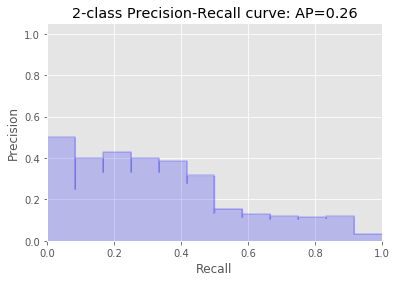

In [17]:
y_score = lr.decision_function(df_test1)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

## Plot precision recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))